In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
# import data into dataframe

df = pd.read_csv("Data.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [31]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


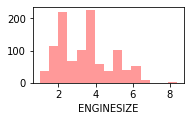

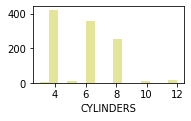

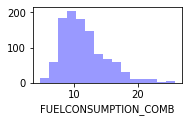

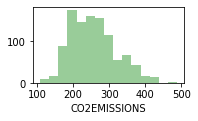

In [82]:
visual = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plt.figure(figsize = (5,3))
plt.subplot(2,2,1)
sns.distplot(visual['ENGINESIZE'],bins = 15, kde = False, color = 'r')
plt.tight_layout()

plt.figure(figsize = (5,3))
plt.subplot(2,2,2)
sns.distplot(visual['CYLINDERS'],bins = 15, kde = False, color = 'y')
plt.tight_layout()

plt.figure(figsize = (5,3))
plt.subplot(2,2,3)
sns.distplot(visual['FUELCONSUMPTION_COMB'],bins = 15, kde = False, color = 'b')
plt.tight_layout()

plt.figure(figsize = (5,3))
plt.subplot(2,2,4)
sns.distplot(visual['CO2EMISSIONS'],bins = 15, kde = False, color = 'g')
plt.tight_layout()

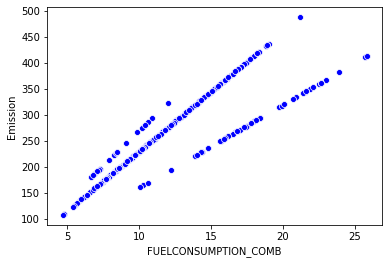

In [34]:
sns.scatterplot(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

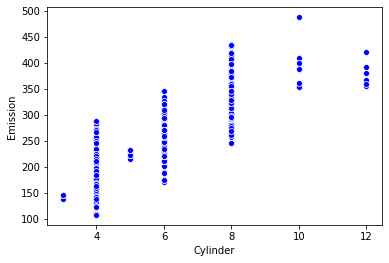

In [84]:
sns.scatterplot(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

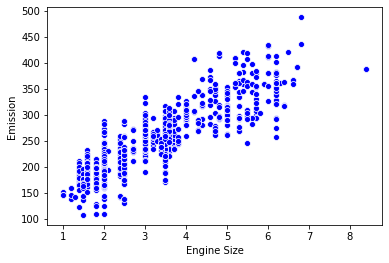

In [83]:
sns.scatterplot(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [45]:
datamask = np.random.rand(len(df)) < 0.8
train_data = cdf[datamask]
test_data = cdf[~datamask]

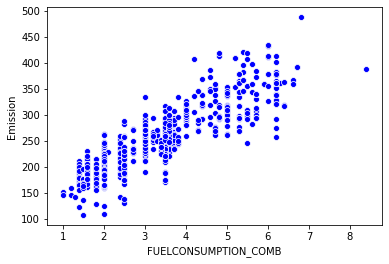

In [46]:
sns.scatterplot(train_data.ENGINESIZE, train_data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [58]:
#Fitting the linear regression for Engine size vs CO2 Emission
 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.24331686]]
Intercept:  [125.23269737]


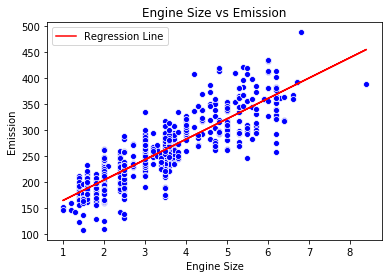

In [79]:
# Plotting regression line

sns.scatterplot(train_data.ENGINESIZE, train_data.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], color = 'red', label = 'Regression Line')
plt.title("Engine Size vs Emission")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.legend()
plt.show()

In [77]:
#Evaluating

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

mae = np.mean(np.absolute(test_y_hat - test_y))
mse = np.mean((test_y_hat - test_y)**2)
R2_score = r2_score(test_y_hat, test_y)

print("Mean Absolute Error: %.2f" % mae)
print("Mean Square Error(MSE): %.2f" % mse)
print("R2 Score: %.2f" % R2_score)

Mean Absolute Error: 25.42
Mean Square Error(MSE): 1113.99
R2 Score: 0.68
